#**Load CIFAR-10 dataset**

***Code 1: Load the CIFAR-10 data and determine training and test data size***

In [ ]:
# load data set
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import cifar10
import matplotlib.pyplot as plt
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print the shape of the training and test data
print('Training data shape:', x_train.shape) # (50000, 32, 32, 3)
print('Training labels shape:', y_train.shape) # (50000, 1)
print('Test data shape:', x_test.shape) # (10000, 32, 32, 3)
print('Test labels shape:', y_test.shape) # (10000, 1)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


***Code 2: Obtain number of classes, number and dimensions of images in CIFAR-10 data***

In [ ]:
# Get the number of images in the training set
num_train_images = x_train.shape[0]

# Get the number of images in the test set
num_test_images = x_test.shape[0]

# Get the number of classes
num_classes = len(np.unique(y_train))

# Get the dimensions of the images
image_height, image_width, image_channels = x_train.shape[1], x_train.shape[2], x_train.shape[3]

# Print the description of the CIFAR-10 dataset
print("The CIFAR-10 dataset contains {} training images and {} test images. There are {} classes, each with {} images.".format(num_train_images, num_test_images, num_classes, num_classes))
print("The images are {}x{}x{} in size.".format(image_height, image_width, image_channels))

The CIFAR-10 dataset contains 50000 training images and 10000 test images. There are 10 classes, each with 10 images.
The images are 32x32x3 in size.


***Code 3: Display CIFAR-10 data classes with seven samples per class size***

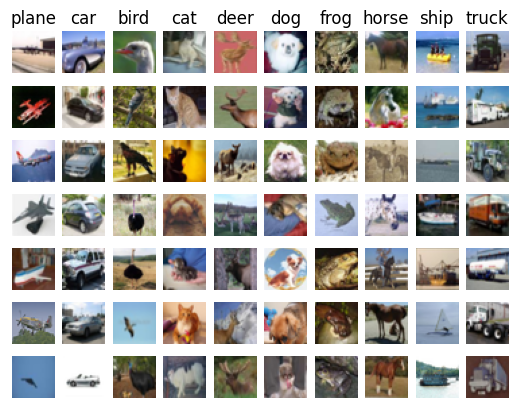

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * 10 + y + 1
        plt.subplot(samples_per_class, 10, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

***Code 4: Normalization of pixel to be between 0 and 1, convertion of labels to one-hot encoded vectors and tuning the hyperparameters***

In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
number_epochs = 70
number_batch_size = 32
image_xdim = 32
image_ydim = 32

#**Model 1 (Basic CNN - No Dropout, No Data Augmentation)**

***Code 5: Model 1 architecture, compiling and training***

In [ ]:
# Define the model architecture
model1 = Sequential()

model1.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=x_train.shape[1:]))
model1.add(MaxPooling2D())

model1.add(Conv2D(32, 3, padding='same', activation='relu'))
model1.add(MaxPooling2D())

model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
history1 = model1.fit(x_train, y_train, epochs=number_epochs, batch_size=number_batch_size, validation_data=(x_test, y_test))

Epoch 1/70
1563/1563 [==============================] - 9s 4ms/step - loss: 1.9027 - accuracy: 0.3179 - val_loss: 1.5944 - val_accuracy: 0.4368
Epoch 2/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5311 - accuracy: 0.4557 - val_loss: 1.7130 - val_accuracy: 0.4149
Epoch 3/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3781 - accuracy: 0.5097 - val_loss: 1.3873 - val_accuracy: 0.5112
Epoch 4/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2647 - accuracy: 0.5560 - val_loss: 1.2140 - val_accuracy: 0.5714
Epoch 5/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1797 - accuracy: 0.5861 - val_loss: 1.2333 - val_accuracy: 0.5702
Epoch 6/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1127 - accuracy: 0.6102 - val_loss: 1.1066 - val_accuracy: 0.6103
Epoch 7/70
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0496 - accuracy: 0.6344 - val_loss: 1.0608 - val_accuracy:

***Code 6: Loss and Accuracy for Model 1***

In [ ]:
# Evaluate the model on the test data
test_loss1, test_accuracy1 = model1.evaluate(x_test, y_test, verbose=0)

# Print the test loss
print(f"Loss for Model 1: {test_loss1:.4f}")

# Print the test accuracy
print("Accuracy for Model 1: %.2f%%" % ((test_accuracy1)*100))

Loss for Model 1: 2.6303
Accuracy for Model 1: 68.74%


***Code 7: Plots of Training and Validation Accuracies and Losses for Model 1***

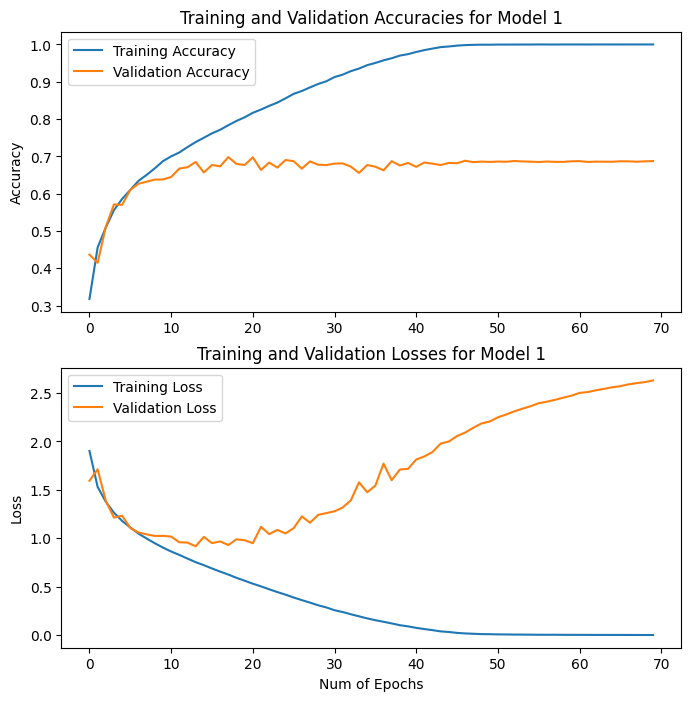

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
# Plots for training and testing process: loss and accuracy
acc1 = history1.history["accuracy"]
val_acc1 = history1.history["val_accuracy"]
loss1 = history1.history["loss"]
val_loss1 = history1.history["val_loss"]

plt.figure(figsize=(8,8))

# Plot 1: Accuracy
plt.subplot(211)
plt.plot(range(number_epochs), acc1, label="Training Accuracy")
plt.plot(range(number_epochs), val_acc1, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracies for Model 1")
plt.ylabel("Accuracy")

# Plot 2: Loss
plt.subplot(212)
plt.plot(range(number_epochs), loss1, label="Training Loss")
plt.plot(range(number_epochs), val_loss1, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Losses for Model 1")
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.show()

***Code 8: Confusion Matrix and Classification Report for Model 1***

The Confusion Matrix Result for Model 1 is :
[[749  29  42  24  22  14  13  20  49  38]
 [ 30 796  13   5   6   7  15   4  31  93]
 [ 75   8 588  61  87  49  73  36  12  11]
 [ 24  14  87 478  74 170  79  37  14  23]
 [ 28   5  92  79 629  38  48  71   7   3]
 [ 16   5  64 171  48 576  31  64  13  12]
 [ 14   8  51  64  44  32 762  11   7   7]
 [ 21   4  25  53  60  61  14 735   4  23]
 [ 71  35  20  17  10   7   8   5 799  28]
 [ 44  91  16  15   5  11  10  19  27 762]]
The Confusion Matrix Result for Model 1 can be visualized as:


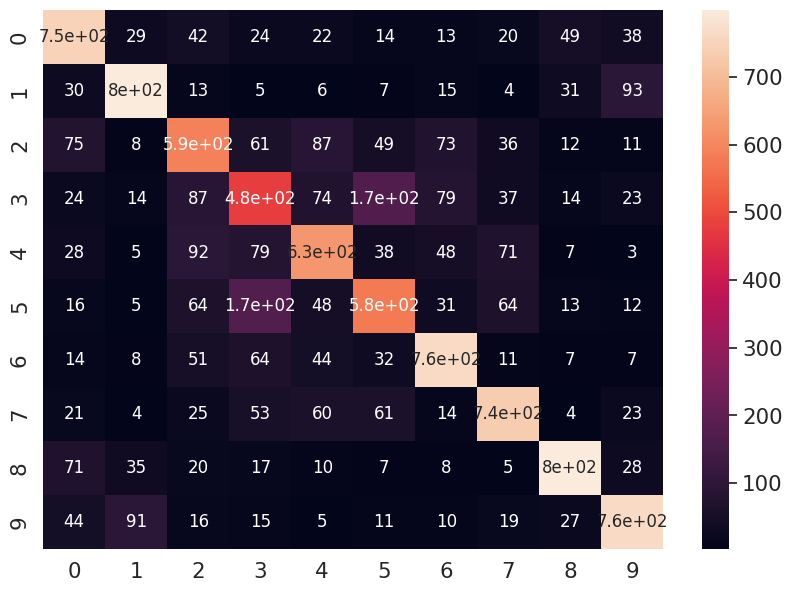

The Classification Report Result for Model 1 is :
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1000
           1       0.80      0.80      0.80      1000
           2       0.59      0.59      0.59      1000
           3       0.49      0.48      0.49      1000
           4       0.64      0.63      0.63      1000
           5       0.60      0.58      0.59      1000
           6       0.72      0.76      0.74      1000
           7       0.73      0.73      0.73      1000
           8       0.83      0.80      0.81      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [ ]:
# Confusion matrix result
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model1.predict(x_test, verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

cm1 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print('The Confusion Matrix Result for Model 1 is :')
print(cm1)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd

df_cm = pd.DataFrame(cm1, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
print('The Confusion Matrix Result for Model 1 can be visualized as:')
plt.show()

# Classification report result
cr1 = classification_report(np.argmax(y_test,axis=1),y_pred)
print('The Classification Report Result for Model 1 is :')
print(cr1)

#**Model 2 (Basic CNN - Dropout, No Data Augmentation)**

***Code 9: Model 2 architecture, compiling and training***

In [ ]:
# Define the model architecture
model2 = Sequential()

model2.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=x_train.shape[1:]))
model2.add(MaxPooling2D())

model2.add(Conv2D(32, 3, padding='same', activation='relu'))
model2.add(Dropout(0.4))
model2.add(MaxPooling2D())

model2.add(Conv2D(32,3, padding='same', activation='relu'))
model2.add(Dropout(0.4))
model2.add(MaxPooling2D())

model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)         

In [ ]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
history2 = model2.fit(x_train, y_train, epochs=number_epochs, batch_size=number_batch_size, validation_data=(x_test, y_test))

Epoch 1/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9369 - accuracy: 0.2956 - val_loss: 1.8083 - val_accuracy: 0.4214
Epoch 2/70
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5673 - accuracy: 0.4310 - val_loss: 1.7098 - val_accuracy: 0.4368
Epoch 3/70
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4277 - accuracy: 0.4827 - val_loss: 1.5629 - val_accuracy: 0.4724
Epoch 4/70
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3388 - accuracy: 0.5205 - val_loss: 1.4477 - val_accuracy: 0.5441
Epoch 5/70
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2765 - accuracy: 0.5433 - val_loss: 1.4582 - val_accuracy: 0.5360
Epoch 6/70
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2199 - accuracy: 0.5641 - val_loss: 1.3370 - val_accuracy: 0.5993
Epoch 7/70
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1732 - accuracy: 0.5839 - val_loss: 1.3344 - val_accuracy:

***Code 10: Loss and Accuracy for Model 2***

In [ ]:
# Evaluate the model on the test data
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test, verbose=0)

# Print the test loss
print(f"Loss for Model 2: {test_loss2:.4f}")

# Print the test accuracy
print("Accuracy for Model 2: %.2f%%" % ((test_accuracy2)*100))

Loss for Model 2: 0.7176
Accuracy for Model 2: 76.50%


***Code 11: Plots of Training and Validation Accuracies and Losses for Model 2***

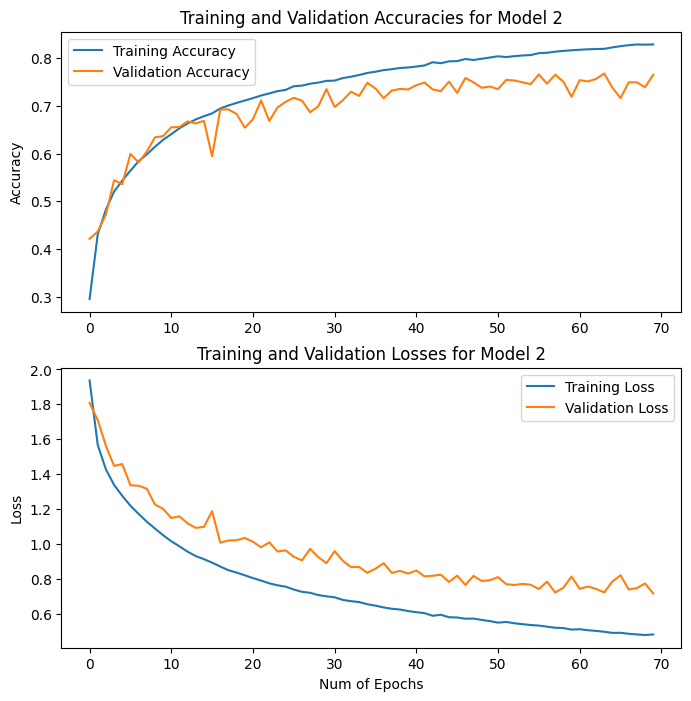

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
# Plots for training and testing process: loss and accuracy
acc2 = history2.history["accuracy"]
val_acc2 = history2.history["val_accuracy"]
loss2 = history2.history["loss"]
val_loss2 = history2.history["val_loss"]

plt.figure(figsize=(8,8))

# Plot 1: Accuracy
plt.subplot(211)
plt.plot(range(number_epochs), acc2, label="Training Accuracy")
plt.plot(range(number_epochs), val_acc2, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracies for Model 2")
plt.ylabel("Accuracy")

# Plot 2: Loss
plt.subplot(212)
plt.plot(range(number_epochs), loss2, label="Training Loss")
plt.plot(range(number_epochs), val_loss2, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Losses for Model 2")
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.show()

***Code 12: Confusion Matrix and Classification Report for Model 2***

The Confusion Matrix Result for Model 2 is :
[[767  15  26  21  55  11  10  14  40  41]
 [  7 872   1   7   6   3  10   3  12  79]
 [ 43   3 529  58 180  75  67  27   6  12]
 [  8   3  26 593 105 154  55  35   6  15]
 [  1   1  18  31 880  15  26  21   2   5]
 [  8   5  19 164  72 669  14  41   2   6]
 [  3   3  12  56  58  21 835   5   3   4]
 [  9   4  12  30  89  45   2 802   0   7]
 [ 48  22   6  20  26   6  11   3 834  24]
 [ 21  53   3  15   8   5   6   7  13 869]]
The Confusion Matrix Result for Model 2 can be visualized as:


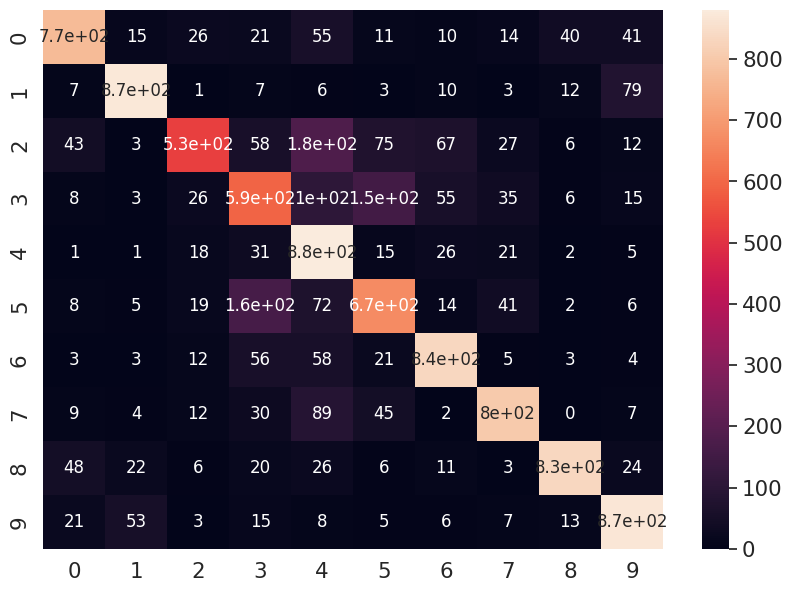

The Classification Report Result for Model 2 is :
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1000
           1       0.89      0.87      0.88      1000
           2       0.81      0.53      0.64      1000
           3       0.60      0.59      0.59      1000
           4       0.59      0.88      0.71      1000
           5       0.67      0.67      0.67      1000
           6       0.81      0.83      0.82      1000
           7       0.84      0.80      0.82      1000
           8       0.91      0.83      0.87      1000
           9       0.82      0.87      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.76      0.76     10000
weighted avg       0.78      0.77      0.76     10000



In [ ]:
# Confusion matrix result
Y_pred = model2.predict(x_test, verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

cm2 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print('The Confusion Matrix Result for Model 2 is :')
print(cm2)

# Visualizing of confusion matrix
df_cm = pd.DataFrame(cm2, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
print('The Confusion Matrix Result for Model 2 can be visualized as:')
plt.show()

# Classification report result
cr2 = classification_report(np.argmax(y_test,axis=1),y_pred)
print('The Classification Report Result for Model 2 is :')
print(cr2)

#**Model 3 (Basic CNN - Data Augmentation, No Dropout)**

***Code 13: Model 3 architecture, compiling and training***

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Define the data generator with data augmentation options
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=30,
    zoom_range=0.1,
)

# Define the model architecture
model3 = Sequential()

model3.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=x_train.shape[1:]))
model3.add(MaxPooling2D())

model3.add(Conv2D(32, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(32,3, padding='same', activation='relu'))
model3.add(MaxPooling2D())

model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 32)        

In [ ]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
train_generator = datagen.flow(x_train, y_train, batch_size=32)
history3 = model3.fit(train_generator, epochs=number_epochs, batch_size=number_batch_size, validation_data=(x_test, y_test))

Epoch 1/70
1563/1563 [==============================] - 26s 16ms/step - loss: 2.0493 - accuracy: 0.2543 - val_loss: 1.7960 - val_accuracy: 0.3713
Epoch 2/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.7363 - accuracy: 0.3792 - val_loss: 1.5835 - val_accuracy: 0.4388
Epoch 3/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5795 - accuracy: 0.4307 - val_loss: 1.4955 - val_accuracy: 0.4640
Epoch 4/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4961 - accuracy: 0.4613 - val_loss: 1.3955 - val_accuracy: 0.4968
Epoch 5/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4369 - accuracy: 0.4852 - val_loss: 1.3930 - val_accuracy: 0.5098
Epoch 6/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3915 - accuracy: 0.5017 - val_loss: 1.3082 - val_accuracy: 0.5330
Epoch 7/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3484 - accuracy: 0.5214 - val_loss: 1.2695 -

***Code 14: Loss and Accuracy for Model 3***

In [ ]:
# Evaluate the model on the test data
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test, verbose=0)

# Print the test loss
print(f"Loss for Model 3: {test_loss3:.4f}")

# Print the test accuracy
print("Accuracy for Model 3: %.2f%%" % ((test_accuracy3)*100))

Loss for Model 3: 0.7496
Accuracy for Model 3: 74.30%


***Code 15: Plots of Training and Validation Accuracies and Losses for Model 3***

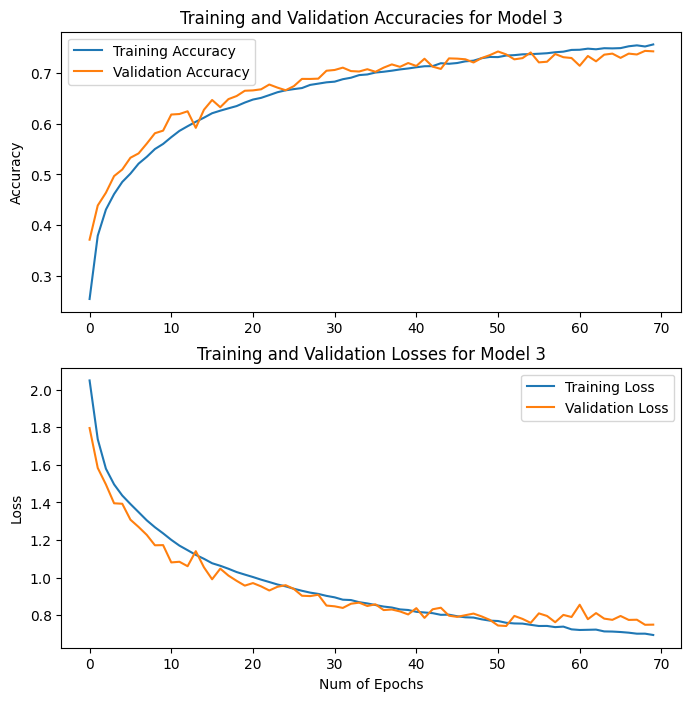

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
# Plots for training and testing process: loss and accuracy
acc3 = history3.history["accuracy"]
val_acc3 = history3.history["val_accuracy"]
loss3 = history3.history["loss"]
val_loss3 = history3.history["val_loss"]

plt.figure(figsize=(8,8))

# Plot 1: Accuracy
plt.subplot(211)
plt.plot(range(number_epochs), acc3, label="Training Accuracy")
plt.plot(range(number_epochs), val_acc3, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracies for Model 3")
plt.ylabel("Accuracy")

# Plot 2: Loss
plt.subplot(212)
plt.plot(range(number_epochs), loss3, label="Training Loss")
plt.plot(range(number_epochs), val_loss3, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Losses for Model 3")
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.show()

***Code 16: Confusion Matrix and Classification Report for Model 3***

The Confusion Matrix Result for Model 3 is :
[[773  29  27  10  34   4  14  18  28  63]
 [  9 890   0   2   1   0   6   4  10  78]
 [ 57  13 560  32 124  49  92  41  10  22]
 [ 23  16  42 498 100 127 112  45   6  31]
 [ 15   4  23  22 794  10  73  53   2   4]
 [  9   8  35 125  66 600  52  86   6  13]
 [  3  15  13  30  32  11 876   8   2  10]
 [ 10   2  19  29  62  25  13 826   2  12]
 [ 75  54   8  15  14   3   8   4 779  40]
 [ 20 100   5   9   5   2   4  12   9 834]]
The Confusion Matrix Result for Model 3 can be visualized as:


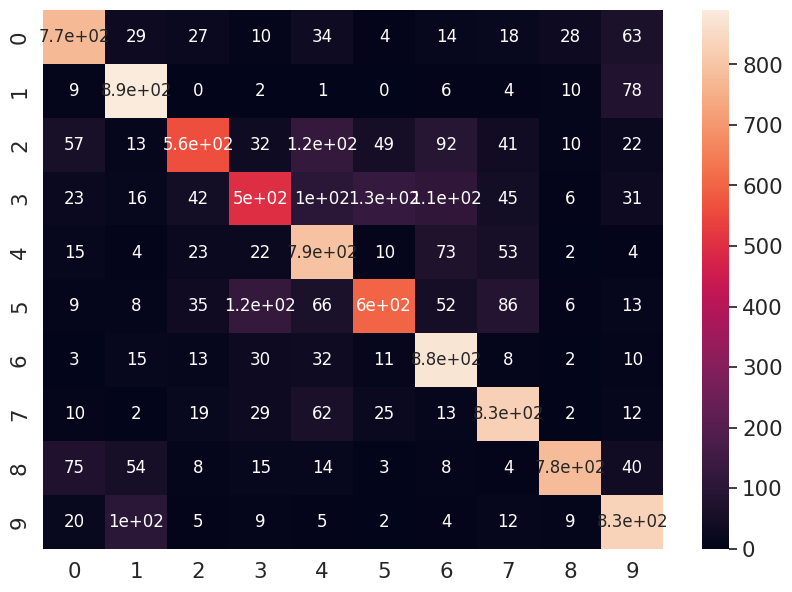

The Classification Report Result for Model 3 is :
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           1       0.79      0.89      0.84      1000
           2       0.77      0.56      0.65      1000
           3       0.65      0.50      0.56      1000
           4       0.64      0.79      0.71      1000
           5       0.72      0.60      0.66      1000
           6       0.70      0.88      0.78      1000
           7       0.75      0.83      0.79      1000
           8       0.91      0.78      0.84      1000
           9       0.75      0.83      0.79      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [ ]:
# Confusion matrix result
Y_pred = model3.predict(x_test, verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

cm3 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print('The Confusion Matrix Result for Model 3 is :')
print(cm3)

# Visualizing of confusion matrix
df_cm = pd.DataFrame(cm3, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
print('The Confusion Matrix Result for Model 3 can be visualized as:')
plt.show()

# Classification report result
cr3 = classification_report(np.argmax(y_test,axis=1),y_pred)
print('The Classification Report Result for Model 3 is :')
print(cr3)

#**Model 4 (Basic CNN - Dropout, Data Augmentation)**

***Code 17: Model 4 architecture, compiling and training***

In [ ]:
# Define the data generator with data augmentation options
datagen_2 = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=30,
    zoom_range=0.1,
)

# Define the model architecture
model4 = Sequential()

model4.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=x_train.shape[1:]))
model4.add(MaxPooling2D())

model4.add(Conv2D(32, 3, padding='same', activation='relu'))
model4.add(Dropout(0.4))
model4.add(MaxPooling2D())

model4.add(Conv2D(32,3, padding='same', activation='relu'))
model4.add(Dropout(0.4))
model4.add(MaxPooling2D())

model4.add(Flatten())
model4.add(Dense(128,activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 32)         

In [ ]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
model4.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
train_generator_2 = datagen_2.flow(x_train, y_train, batch_size=32)
history4 = model4.fit(train_generator_2, epochs=number_epochs, batch_size=number_batch_size, validation_data=(x_test, y_test))

Epoch 1/70
1563/1563 [==============================] - 27s 16ms/step - loss: 1.9774 - accuracy: 0.2808 - val_loss: 1.8734 - val_accuracy: 0.3862
Epoch 2/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6738 - accuracy: 0.3954 - val_loss: 1.6997 - val_accuracy: 0.4514
Epoch 3/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.5549 - accuracy: 0.4389 - val_loss: 1.6071 - val_accuracy: 0.4857
Epoch 4/70
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4786 - accuracy: 0.4639 - val_loss: 1.5740 - val_accuracy: 0.5030
Epoch 5/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4245 - accuracy: 0.4860 - val_loss: 1.4597 - val_accuracy: 0.5346
Epoch 6/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3754 - accuracy: 0.5059 - val_loss: 1.4613 - val_accuracy: 0.5504
Epoch 7/70
1563/1563 [==============================] - 25s 16ms/step - loss: 1.3358 - accuracy: 0.5196 - val_loss: 1.3857 -

***Code 18: Loss and Accuracy for Model 4***

In [ ]:
# Evaluate the model on the test data
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test, verbose=0)

# Print the test loss
print(f"Loss for Model 4: {test_loss4:.4f}")

# Print the test accuracy
print("Accuracy for Model 4: %.2f%%" % ((test_accuracy4)*100))

Loss for Model 4: 0.8323
Accuracy for Model 4: 74.03%


***Code 19: Plots of Training and Validation Accuracies and Losses for Model 4***

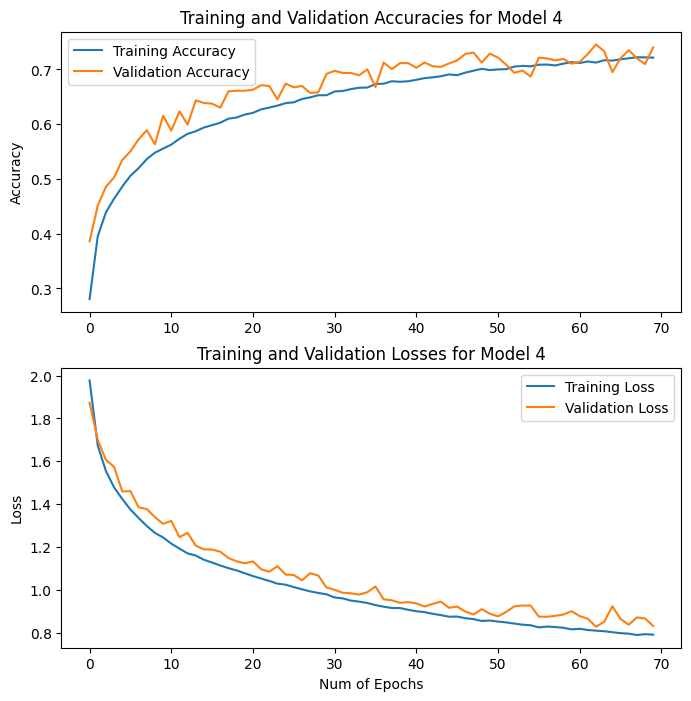

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
# Plots for training and testing process: loss and accuracy
acc4 = history4.history["accuracy"]
val_acc4 = history4.history["val_accuracy"]
loss4 = history4.history["loss"]
val_loss4 = history4.history["val_loss"]

plt.figure(figsize=(8,8))

# Plot 1: Accuracy
plt.subplot(211)
plt.plot(range(number_epochs), acc4, label="Training Accuracy")
plt.plot(range(number_epochs), val_acc4, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracies for Model 4")
plt.ylabel("Accuracy")

# Plot 2: Loss
plt.subplot(212)
plt.plot(range(number_epochs), loss4, label="Training Loss")
plt.plot(range(number_epochs), val_loss4, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Losses for Model 4")
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.show()

***Code 20: Confusion Matrix and Classification Report for Model 4***

The Confusion Matrix Result for Model 4 is :
[[778  27  11   6  29  11  12  15  36  75]
 [  4 888   0   0   1   1   5   1  11  89]
 [ 83   7 449  35 148  97 105  38  11  27]
 [ 16   8  18 457  93 193  98  36  13  68]
 [ 11   3   9  17 777  28  75  63   8   9]
 [  9   5   8  88  64 693  44  48   4  37]
 [ 10   3   7  23  32  17 878  10   6  14]
 [ 12   3   6  23  68  42  11 801   2  32]
 [ 65  50   5   7  14   5   5   3 801  45]
 [ 25  59   3   6   3   4   2   4  13 881]]
The Confusion Matrix Result for Model 4 can be visualized as:


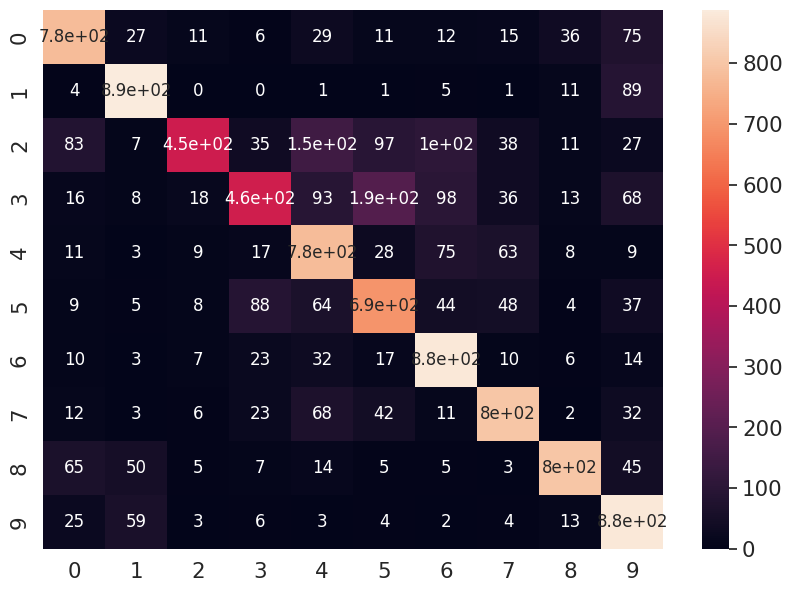

The Classification Report Result for Model 4 is :
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1000
           1       0.84      0.89      0.87      1000
           2       0.87      0.45      0.59      1000
           3       0.69      0.46      0.55      1000
           4       0.63      0.78      0.70      1000
           5       0.64      0.69      0.66      1000
           6       0.71      0.88      0.79      1000
           7       0.79      0.80      0.79      1000
           8       0.89      0.80      0.84      1000
           9       0.69      0.88      0.77      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.73     10000
weighted avg       0.75      0.74      0.73     10000



In [ ]:
# Confusion matrix result
Y_pred = model4.predict(x_test, verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

cm4 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print('The Confusion Matrix Result for Model 4 is :')
print(cm4)

# Visualizing of confusion matrix
df_cm = pd.DataFrame(cm4, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
print('The Confusion Matrix Result for Model 4 can be visualized as:')
plt.show()

# Classification report result
cr4 = classification_report(np.argmax(y_test,axis=1),y_pred)
print('The Classification Report Result for Model 4 is :')
print(cr4)

#**Model 5 (VGG - 16 Layers)**

***Code 21: Model 5 architecture, compiling and training***

In [ ]:
from keras.applications import VGG16

model5 = Sequential()

base_model = VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=x_train.shape[1])

model5.add(base_model) #Adds the base model (in this case vgg16 to model)
model5.add(Flatten()) #Since the output before the flatten layer is a matrix we have to use this function to get a vector of the form nX1 to feed it into the fully connected layers

#Adding the Dense layers along with activation and batch normalization
model5.add(Dense(1024,activation=('relu'),input_dim=512))
model5.add(Dropout(0.4))
model5.add(Dense(10,activation=('softmax'))) #This is the classification layer
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 10)                10250     
                                                                 
Total params: 15,250,250
Trainable params: 15,250,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
model5.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
history5 = model5.fit(x_train, y_train, epochs=number_epochs, batch_size=number_batch_size, validation_data=(x_test, y_test))

Epoch 1/70
1563/1563 [==============================] - 49s 29ms/step - loss: 1.0139 - accuracy: 0.6479 - val_loss: 0.7633 - val_accuracy: 0.7410
Epoch 2/70
1563/1563 [==============================] - 44s 28ms/step - loss: 0.5711 - accuracy: 0.8056 - val_loss: 0.5424 - val_accuracy: 0.8132
Epoch 3/70
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4357 - accuracy: 0.8494 - val_loss: 0.5354 - val_accuracy: 0.8152
Epoch 4/70
1563/1563 [==============================] - 44s 28ms/step - loss: 0.3369 - accuracy: 0.8851 - val_loss: 0.4815 - val_accuracy: 0.8360
Epoch 5/70
1563/1563 [==============================] - 44s 28ms/step - loss: 0.2581 - accuracy: 0.9114 - val_loss: 0.4782 - val_accuracy: 0.8433
Epoch 6/70
1563/1563 [==============================] - 44s 28ms/step - loss: 0.2020 - accuracy: 0.9311 - val_loss: 0.4580 - val_accuracy: 0.8541
Epoch 7/70
1563/1563 [==============================] - 44s 28ms/step - loss: 0.1476 - accuracy: 0.9497 - val_loss: 0.5161 -

***Code 22: Model 5 Architecture in the form of ASCII Art Diagram***

In [ ]:
!pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_sequential_ascii import keras2ascii

#Sequential Model
keras2ascii(model5)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
          Functional   ????? -------------------  14714688    96.5%
                       #####      1    1  512
             Flatten   ||||| -------------------         0     0.0%
                       #####         512
               Dense   XXXXX -------------------    525312     3.4%
                relu   #####        1024
             Dropout    | || -------------------         0     0.0%
                       #####        1024
               Dense   XXXXX -------------------     10250     0.1%
             softmax   #####          10


***Code 23: Loss and Accuracy for Model 5***

In [ ]:
# Evaluate the model on the test data
test_loss5, test_accuracy5 = model5.evaluate(x_test, y_test, verbose=0)

# Print the test loss
print(f"Loss for Model 5: {test_loss5:.4f}")

# Print the test accuracy
print("Accuracy for Model 5: %.2f%%" % ((test_accuracy5)*100))

Loss for Model 5: 0.8913
Accuracy for Model 5: 88.22%


***Code 24: Plots of Training and Validation Accuracies and Losses for Model 5***

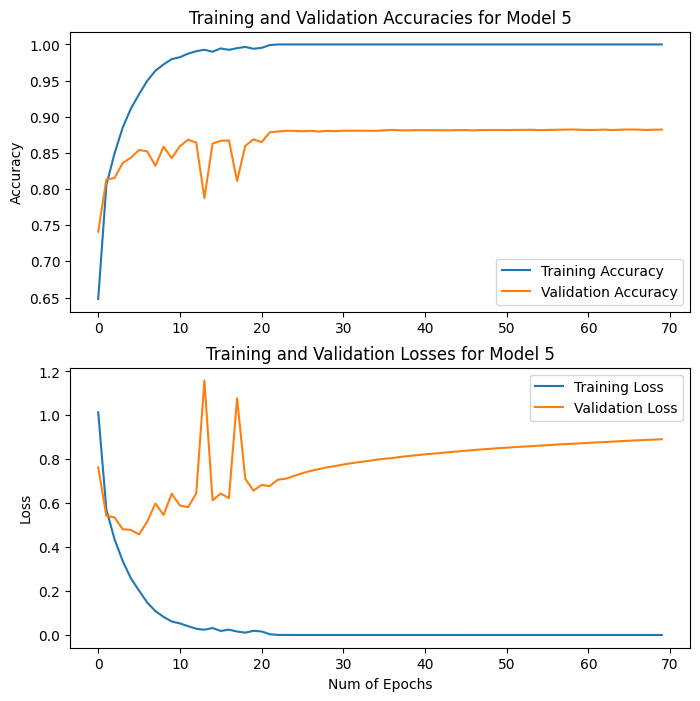

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
# Plots for training and testing process: loss and accuracy
acc5 = history5.history["accuracy"]
val_acc5 = history5.history["val_accuracy"]
loss5 = history5.history["loss"]
val_loss5 = history5.history["val_loss"]

plt.figure(figsize=(8,8))

# Plot 1: Accuracy
plt.subplot(211)
plt.plot(range(number_epochs), acc5, label="Training Accuracy")
plt.plot(range(number_epochs), val_acc5, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracies for Model 5")
plt.ylabel("Accuracy")

# Plot 2: Loss
plt.subplot(212)
plt.plot(range(number_epochs), loss5, label="Training Loss")
plt.plot(range(number_epochs), val_loss5, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Losses for Model 5")
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.show()

***Code 25: Confusion Matrix and Classification Report for Model 5***

The Confusion Matrix Result for Model 5 is :
[[908   6  21   6   9   1   5   9  24  11]
 [ 13 936   0   0   0   4   2   0   5  40]
 [ 21   1 848  24  38  21  27  14   5   1]
 [ 11   5  29 755  33 102  38  18   4   5]
 [  5   1  22  27 892  17  16  16   4   0]
 [  3   0  15 126  28 788  12  24   0   4]
 [  3   2  17  34  15   8 911   4   3   3]
 [ 10   3  11  22  18  16   1 915   1   3]
 [ 25   9   6   6   1   1   3   1 939   9]
 [ 12  38   4   2   1   1   0   0  12 930]]
The Confusion Matrix Result for Model 5 can be visualized as:


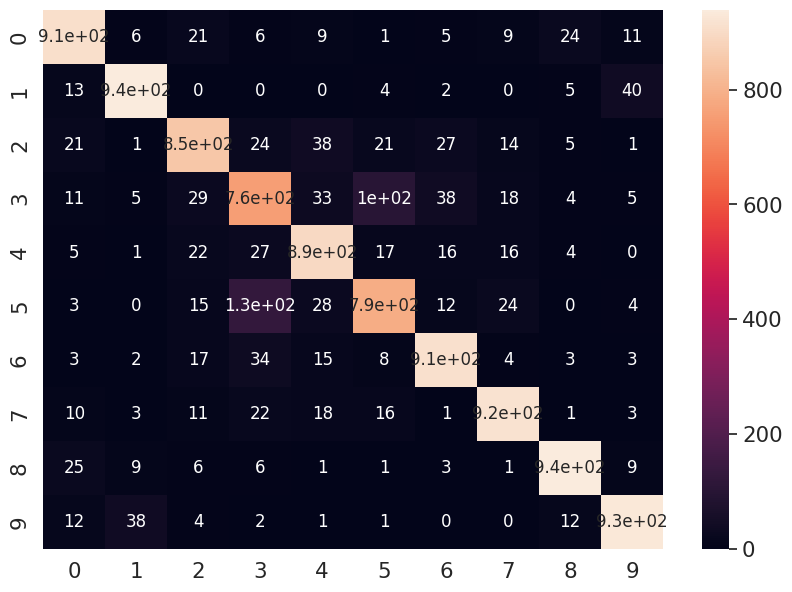

The Classification Report Result for Model 5 is :
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1000
           1       0.94      0.94      0.94      1000
           2       0.87      0.85      0.86      1000
           3       0.75      0.76      0.75      1000
           4       0.86      0.89      0.88      1000
           5       0.82      0.79      0.80      1000
           6       0.90      0.91      0.90      1000
           7       0.91      0.92      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
# Confusion matrix result
Y_pred = model5.predict(x_test, verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

cm5 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print('The Confusion Matrix Result for Model 5 is :')
print(cm5)

# Visualizing of confusion matrix
df_cm = pd.DataFrame(cm5, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
print('The Confusion Matrix Result for Model 5 can be visualized as:')
plt.show()

# Classification report result
cr5 = classification_report(np.argmax(y_test,axis=1),y_pred)
print('The Classification Report Result for Model 5 is :')
print(cr5)

#**Model 6 (VGG - 19 layers)**

***Code 26: Model 6 architecture, compiling and training***

In [ ]:
from keras.applications import VGG19

model6 = Sequential()

base_model = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=x_train.shape[1])

model6.add(base_model) #Adds the base model (in this case vgg19 to model)
model6.add(Flatten()) #Since the output before the flatten layer is a matrix we have to use this function to get a vector of the form nX1 to feed it into the fully connected layers

#Adding the Dense layers along with activation and batch normalization
model6.add(Dense(1024,activation=('relu'),input_dim=512))
model6.add(Dropout(0.4))
model6.add(Dense(10,activation=('softmax'))) #This is the classification layer
model6.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 1024)              525312    
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                10250     
                                                                 
Total params: 20,559,946
Trainable params: 20,559,946
Non-trainable params: 0
___________________________________________

In [ ]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
model6.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
history6 = model6.fit(x_train, y_train, epochs=number_epochs, batch_size=number_batch_size, validation_data=(x_test, y_test))

Epoch 1/70
1563/1563 [==============================] - 60s 37ms/step - loss: 1.0456 - accuracy: 0.6383 - val_loss: 0.8280 - val_accuracy: 0.7234
Epoch 2/70
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6137 - accuracy: 0.7939 - val_loss: 0.9319 - val_accuracy: 0.6926
Epoch 3/70
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4725 - accuracy: 0.8389 - val_loss: 0.5237 - val_accuracy: 0.8236
Epoch 4/70
1563/1563 [==============================] - 56s 36ms/step - loss: 0.3778 - accuracy: 0.8711 - val_loss: 0.5362 - val_accuracy: 0.8198
Epoch 5/70
1563/1563 [==============================] - 56s 36ms/step - loss: 0.3028 - accuracy: 0.8976 - val_loss: 0.5671 - val_accuracy: 0.8211
Epoch 6/70
1563/1563 [==============================] - 56s 36ms/step - loss: 0.2396 - accuracy: 0.9183 - val_loss: 0.5445 - val_accuracy: 0.8359
Epoch 7/70
1563/1563 [==============================] - 56s 36ms/step - loss: 0.1868 - accuracy: 0.9363 - val_loss: 0.5194 -

***Code 27: Model 6 Architecture in the form of ASCII Art Diagram***

In [ ]:
#Sequential Model
keras2ascii(model6)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    3
          Functional   ????? -------------------  20024384    97.4%
                       #####      1    1  512
             Flatten   ||||| -------------------         0     0.0%
                       #####         512
               Dense   XXXXX -------------------    525312     2.6%
                relu   #####        1024
             Dropout    | || -------------------         0     0.0%
                       #####        1024
               Dense   XXXXX -------------------     10250     0.0%
             softmax   #####          10


***Code 28: Loss and Accuracy for Model 6***

In [ ]:
# Evaluate the model on the test data
test_loss6, test_accuracy6 = model6.evaluate(x_test, y_test, verbose=0)

# Print the test loss
print(f"Loss for Model 6: {test_loss6:.4f}")

# Print the test accuracy
print("Accuracy for Model 6: %.2f%%" % ((test_accuracy6)*100))

Loss for Model 6: 0.9203
Accuracy for Model 6: 87.30%


***Code 29: Plots of Training and Validation Accuracies and Losses for Model 6***

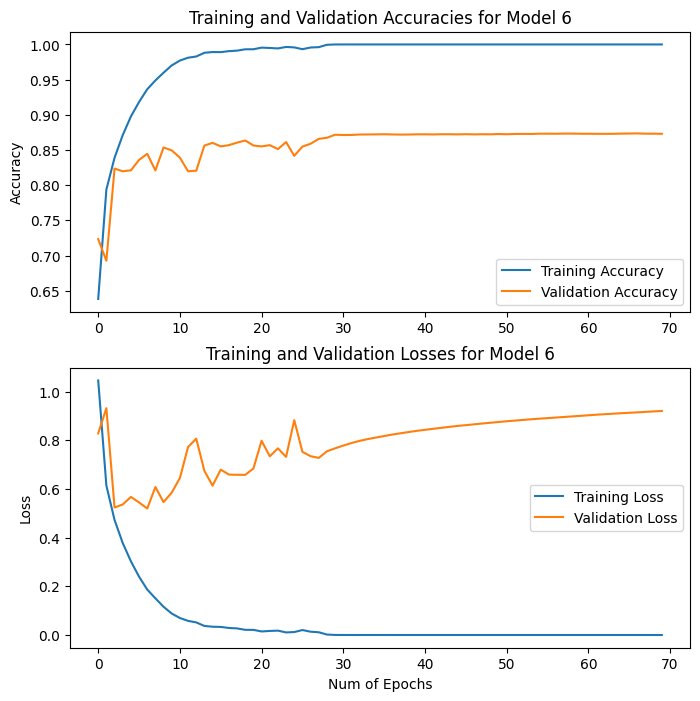

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
# Plots for training and testing process: loss and accuracy
acc6 = history6.history["accuracy"]
val_acc6 = history6.history["val_accuracy"]
loss6 = history6.history["loss"]
val_loss6 = history6.history["val_loss"]

plt.figure(figsize=(8,8))

# Plot 1: Accuracy
plt.subplot(211)
plt.plot(range(number_epochs), acc6, label="Training Accuracy")
plt.plot(range(number_epochs), val_acc6, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracies for Model 6")
plt.ylabel("Accuracy")

# Plot 2: Loss
plt.subplot(212)
plt.plot(range(number_epochs), loss6, label="Training Loss")
plt.plot(range(number_epochs), val_loss6, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Losses for Model 6")
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.show()

***Code 30: Confusion Matrix and Classification Report for Model 6***

The Confusion Matrix Result for Model 6 is :
[[899  11  16  12   6   1   4   7  30  14]
 [  7 939   2   2   0   2   3   0   8  37]
 [ 30   3 827  33  37  24  26  14   3   3]
 [ 17   4  30 726  36 110  41  23   6   7]
 [  7   1  23  31 889  12  21  13   2   1]
 [  1   0  21 121  23 794  11  25   3   1]
 [  4   3  18  29  17   7 911   2   3   6]
 [ 12   3  11  24  31  25   2 887   3   2]
 [ 24  10   4   5   3   1   2   0 939  12]
 [ 16  40   3   7   0   2   2   0  11 919]]
The Confusion Matrix Result for Model 6 can be visualized as:


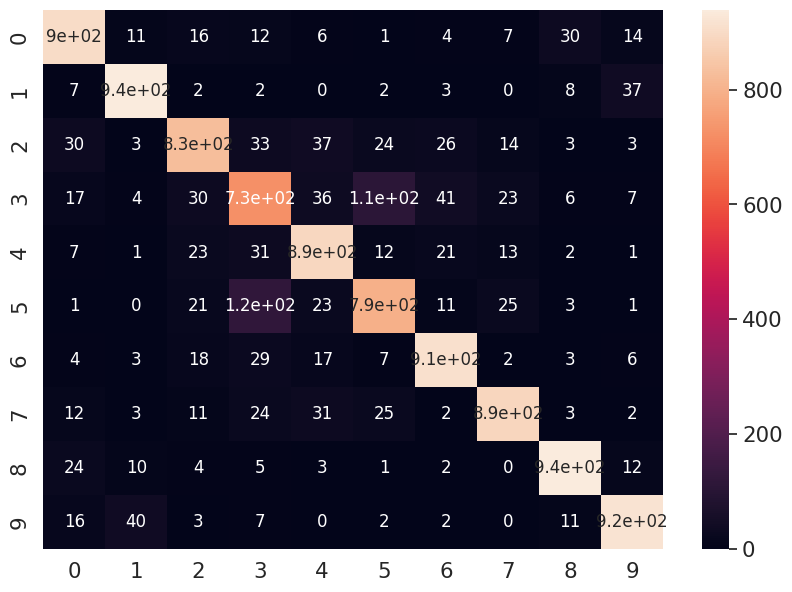

The Classification Report Result for Model 6 is :
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1000
           1       0.93      0.94      0.93      1000
           2       0.87      0.83      0.85      1000
           3       0.73      0.73      0.73      1000
           4       0.85      0.89      0.87      1000
           5       0.81      0.79      0.80      1000
           6       0.89      0.91      0.90      1000
           7       0.91      0.89      0.90      1000
           8       0.93      0.94      0.94      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
# Confusion matrix result
Y_pred = model6.predict(x_test, verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

cm6 = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print('The Confusion Matrix Result for Model 6 is :')
print(cm6)

# Visualizing of confusion matrix
df_cm = pd.DataFrame(cm6, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
print('The Confusion Matrix Result for Model 6 can be visualized as:')
plt.show()

# Classification report result
cr6 = classification_report(np.argmax(y_test,axis=1),y_pred)
print('The Classification Report Result for Model 6 is :')
print(cr6)

#**Model Comparison**

***Code 31: Comparison of Training and Validation Accuracies for all Models***

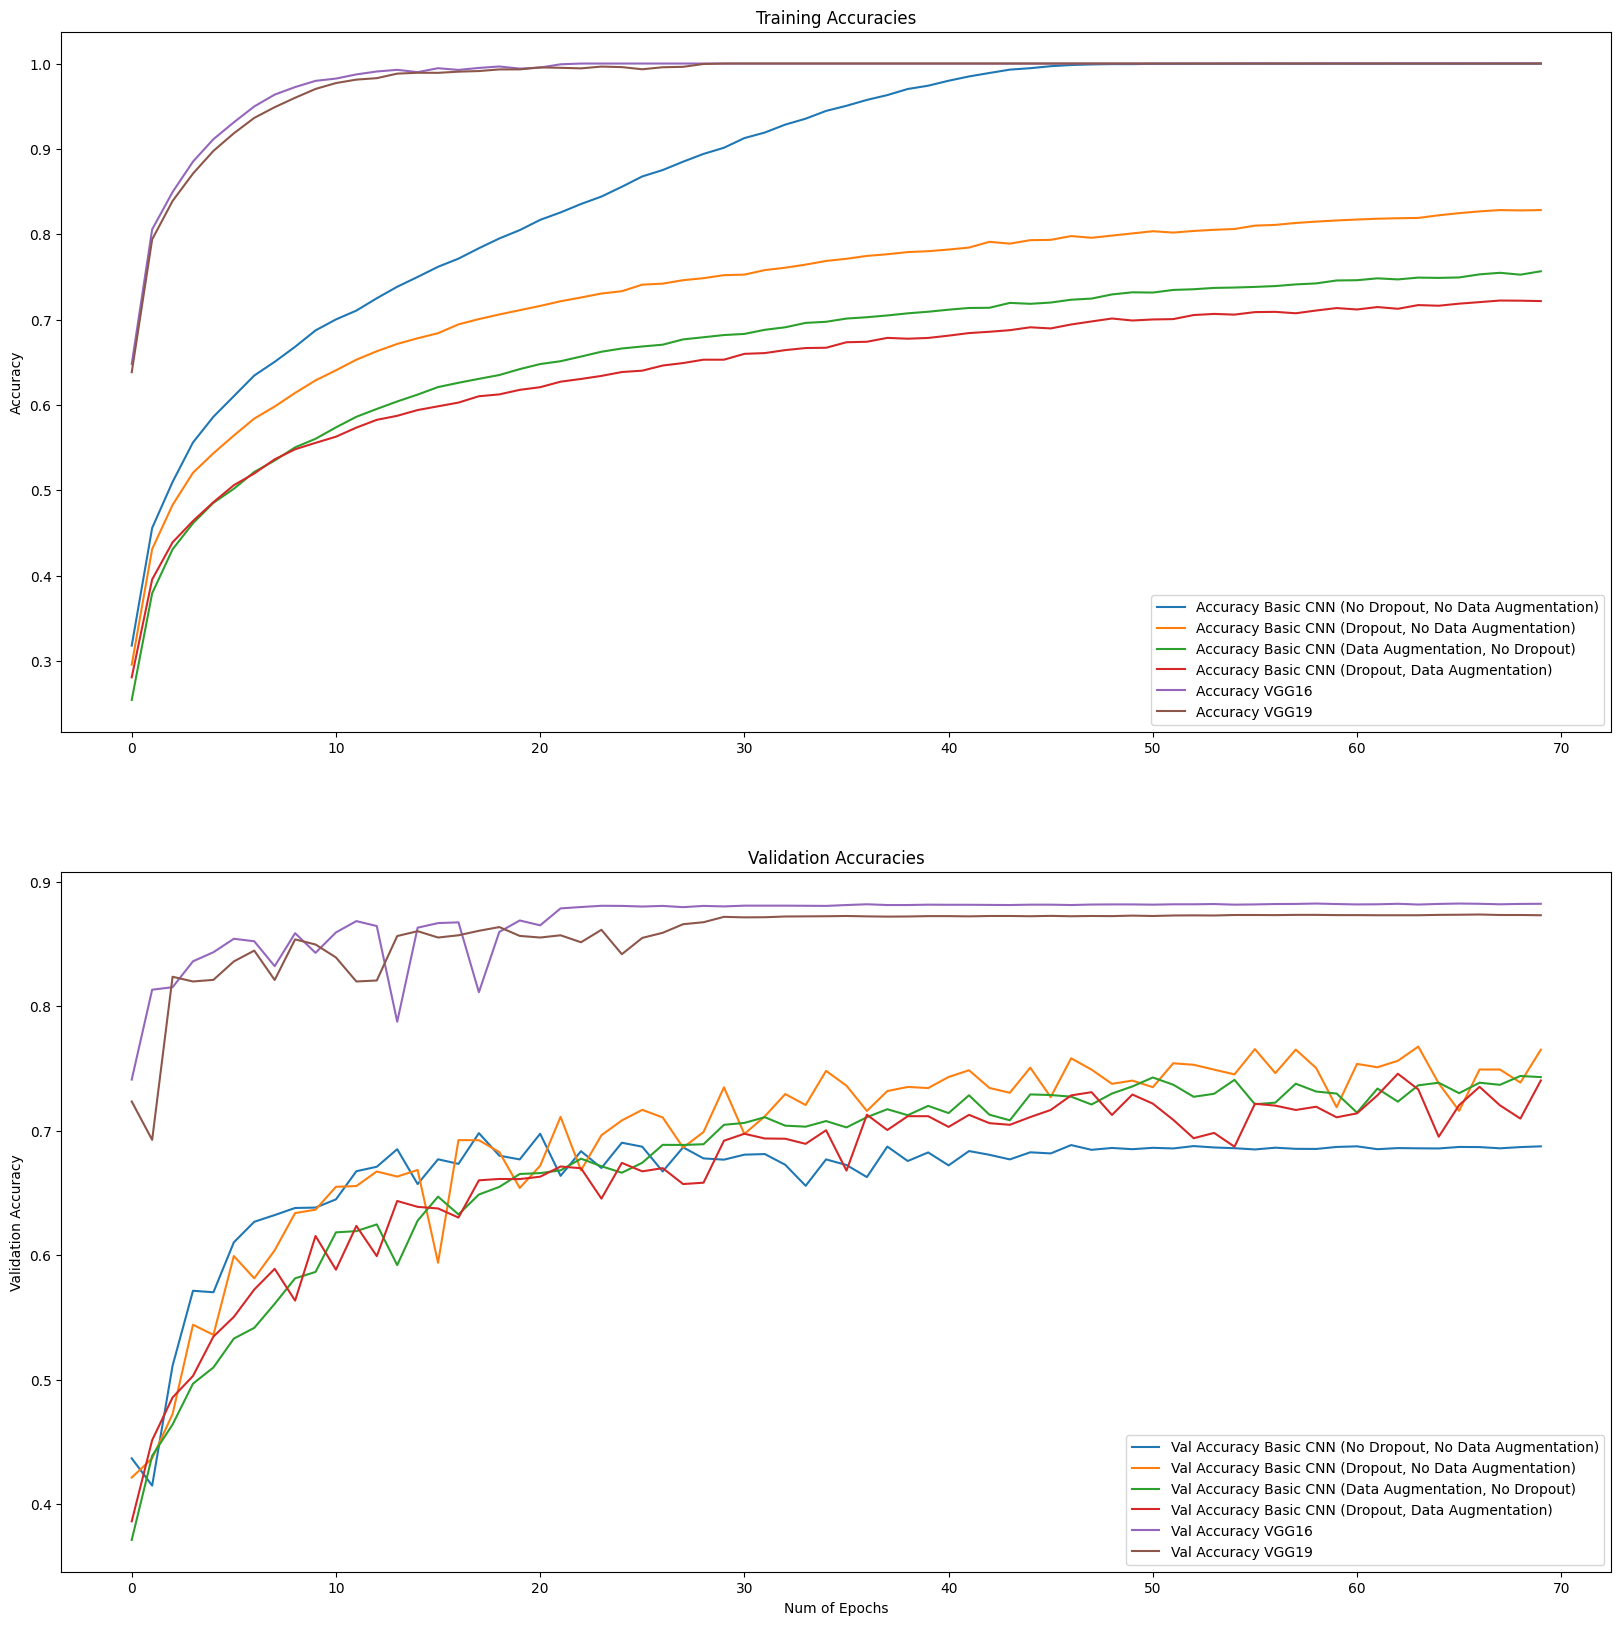

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(20,20))

plt.subplot(211)
plt.plot(range(number_epochs), acc1, label="Accuracy Basic CNN (No Dropout, No Data Augmentation)")
plt.plot(range(number_epochs), acc2, label="Accuracy Basic CNN (Dropout, No Data Augmentation)")
plt.plot(range(number_epochs), acc3, label="Accuracy Basic CNN (Data Augmentation, No Dropout)")
plt.plot(range(number_epochs), acc4, label="Accuracy Basic CNN (Dropout, Data Augmentation)")
plt.plot(range(number_epochs), acc5, label="Accuracy VGG16")
plt.plot(range(number_epochs), acc6, label="Accuracy VGG19")
plt.legend(loc="best")
plt.title("Training Accuracies")
plt.ylabel("Accuracy")

plt.subplot(212)
plt.plot(range(number_epochs), val_acc1, label="Val Accuracy Basic CNN (No Dropout, No Data Augmentation)")
plt.plot(range(number_epochs), val_acc2, label="Val Accuracy Basic CNN (Dropout, No Data Augmentation)")
plt.plot(range(number_epochs), val_acc3, label="Val Accuracy Basic CNN (Data Augmentation, No Dropout)")
plt.plot(range(number_epochs), val_acc4, label="Val Accuracy Basic CNN (Dropout, Data Augmentation)")
plt.plot(range(number_epochs), val_acc5, label="Val Accuracy VGG16")
plt.plot(range(number_epochs), val_acc6, label="Val Accuracy VGG19")
plt.legend(loc="best")
plt.title("Validation Accuracies")
plt.xlabel("Num of Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

***Code 32: Comparison of Training and Validation Losses for all Models***

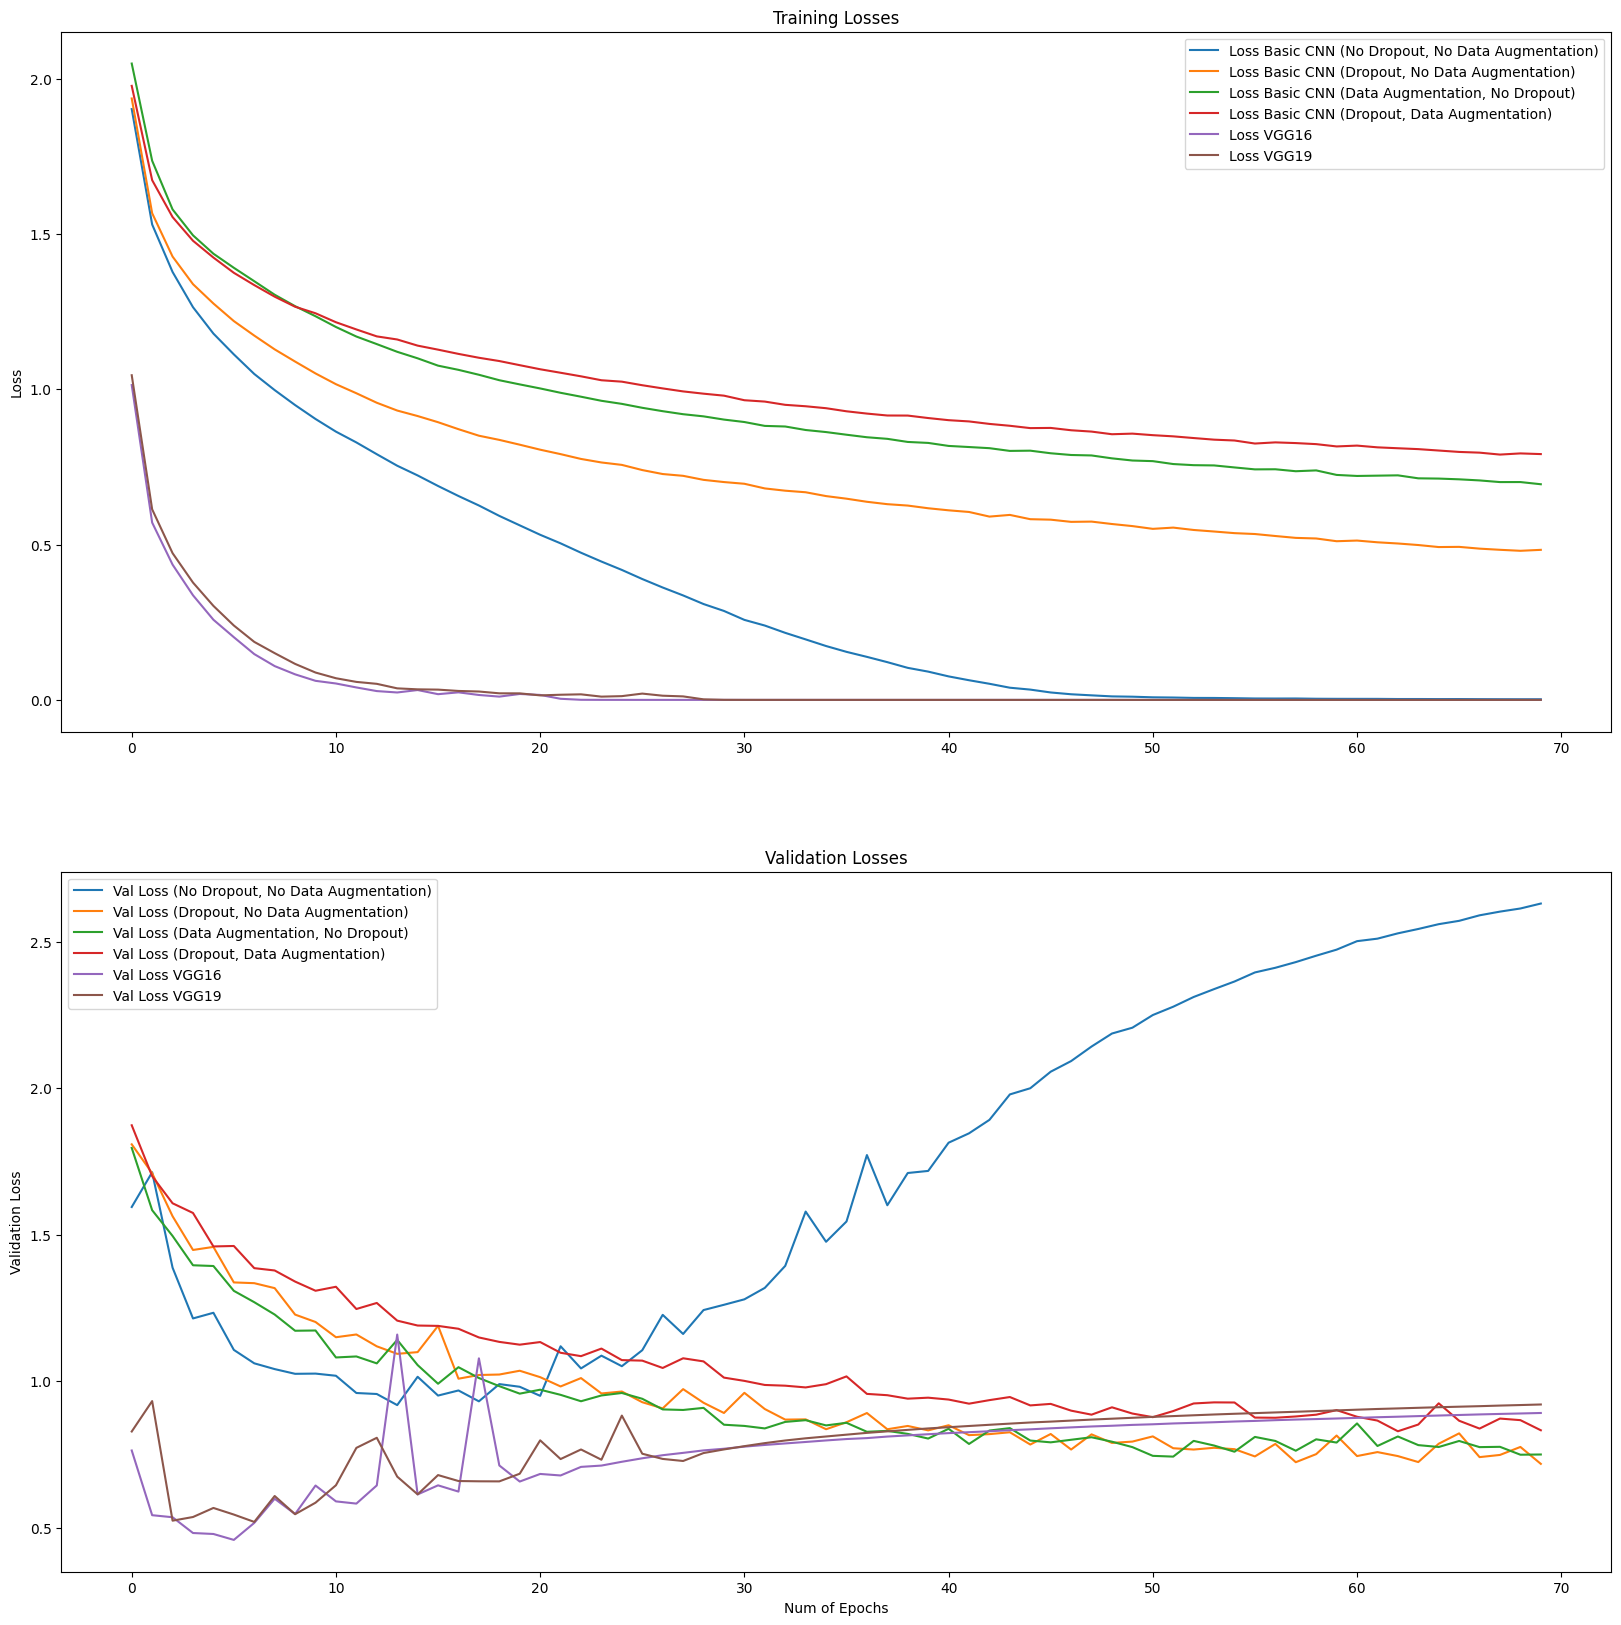

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(20,20))

plt.subplot(211)
plt.plot(range(number_epochs), loss1, label="Loss Basic CNN (No Dropout, No Data Augmentation)")
plt.plot(range(number_epochs), loss2, label="Loss Basic CNN (Dropout, No Data Augmentation)")
plt.plot(range(number_epochs), loss3, label="Loss Basic CNN (Data Augmentation, No Dropout)")
plt.plot(range(number_epochs), loss4, label="Loss Basic CNN (Dropout, Data Augmentation)")
plt.plot(range(number_epochs), loss5, label="Loss VGG16")
plt.plot(range(number_epochs), loss6, label="Loss VGG19")
plt.legend(loc="best")
plt.title("Training Losses")
plt.ylabel("Loss")

plt.subplot(212)
plt.plot(range(number_epochs), val_loss1, label="Val Loss (No Dropout, No Data Augmentation)")
plt.plot(range(number_epochs), val_loss2, label="Val Loss (Dropout, No Data Augmentation)")
plt.plot(range(number_epochs), val_loss3, label="Val Loss (Data Augmentation, No Dropout)")
plt.plot(range(number_epochs), val_loss4, label="Val Loss (Dropout, Data Augmentation)")
plt.plot(range(number_epochs), val_loss5, label="Val Loss VGG16")
plt.plot(range(number_epochs), val_loss6, label="Val Loss VGG19")
plt.legend(loc="best")
plt.title("Validation Losses")
plt.xlabel("Num of Epochs")
plt.ylabel("Validation Loss")
plt.show()